# Assigning Grades to Sales Leads with ML Classification

### by Michael Weber

----------------------------------------------------------------------------------------------

In [ ]:
you can follow the code and all other additional resources at:
    
    

__Motivation__

I wanted to use ML to tackle a real world problem and build something using a supervised learning 
classification model that could be an asset to the current business climate. 

Nearly every business relies heavily on sales for revenue and market share and I saw an opportunity
in the sales funnel to optimize the handling of qualified sales leads through grading and prioritization.
Many companies use ML modeling for forecasting and budgeting at a high level but I wanted to create something
for the salesperson to use in their day to day work life to improve overall sales performance company-wide.

__The Sales Funnel__

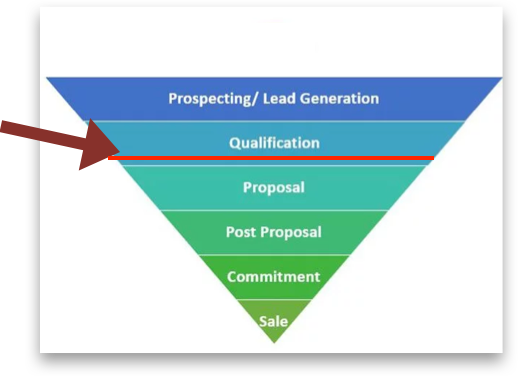

I thought that by giving grades to the qualified leads before they are handed off to the sales 
person (red line and arrow) I can increase efficiency of each sales person __saving time,
increasing exposure to "winnable leads", and giving the company more chances at higher sales revenue numbers.__

__Data__

I used sales data with __Win and Loss binary target results from IBM Watson Analytics Blog__ 
https://www.ibm.com/communities/analytics/watson-analytics-blog/sales-win-loss-sample-dataset/
    
The __original data had 78k observations and 19 features including the target variable "Opportunity Result"__ 

Other features included Business Sector in the form of groups and subgroups, Region or location 6 categories in the USA, the client company size by employee count, revenue and if they had purchased in the past and then 7 columns with data about the amount of time an opportunity took to either become a sale Won or Loss.

__Data Cleaning and EDA__

I found there were __some missing values__ and also __some zeros__ for the some of the 
quantitative feature values so I __removed those from the dataset.__ 

EDA poking around found and filtering by my target variable showed some of the results below:

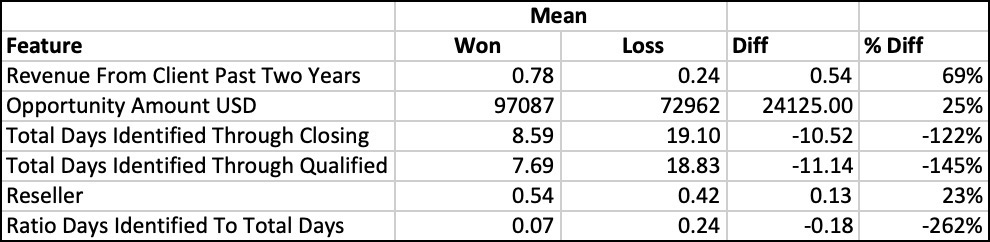

__Minimum Viable Product is K Nearest Neighbors__

After initial cleaning I used __one hot encoding__ to modify my __categorical features__ and with train test split 
used a __Logistic Regression Model & K Nearest Neighbors__ on plain train data to get a baseline and to determine next steps.

LR scored faily well 77% accuracy 
But KNN scored surprisingly well at 90%

I actually also used a Linear Regression model and converted my target variable to binary 0 for Loss and 1 for Win
and ran that model to check coefficients of my features and found similar to above the features with days to close 
were the most predictive. But I realized these are considered leaky data features because at the time a sales person 
receives a lead they cannot know how long this lead will take to close so I decided to remove those 7 features.

__More Models__

I tested many models and found many were similar scoring but Support Vector, Random Forest, ADA Boost seemed to perform best
and Support Vector and Random Forest take forever to run so I chose the ADA Boost.

__XGBoost Classifier is chosen__

But after reading up more I found X Gradient Boost Classifier to be more suited to my needs of robust prediction power
with speed for binary classification. XGBoost also helps to reduce overfitting and run a lot of the tuning through Cross Validation under the hood.

__Dealing with Class Imbalance__

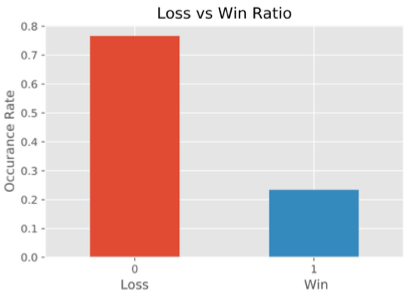

I tried 3 techniques to balance my classes with Oversampling:
    __Random Oversampling, SMOTE, ADASYN__
    
I had 77% Loss 23% Won class imbalance so accuracy wasn't proving a good metric and I wanted
to give my model more observations of the minority class to train on.

__ADASYN__ seemed to give me the best results of increased F1 score I think because it uses
density distribution to determine the synthetic minority points and I read it also adaptively 
changes the weights of the different minority samples to compensate for the skewed distributions.

__Tuning XGBoost Classifier__

After training on the synthetic balanced data set I also began to tune the various hyper parameters
within the XGBoost Model. max_depth  learning_rate  n_estimators  gamma  min_child_weight  subsample  and objective.

Tuning these slowly but surely with trial and error and GridSearch gave me a small but sufficient increase in F1 scores and AUC.

__Cross Validation__

Before the test set, I chose 10 fold Cross Validation and split my data to train, val, test for a nice final variance mitigation.


__FINAL RESULTS__

F1 Score 81
AUC Score 83

__CONCLUSION__

The model is not super predictive but I think it does well enough to provide some definite value
and can handle a grading system as it is now. A company deploying this model to grade their qualified
sales leads as they are handed off to the sales person will most certainly see a boost in performance.

Future Work

I would like to bring in more data because this set was rather narrow in scope(mostly just automotive industry and IBM)

I began a __Flask Web App__ but it still needs a lot of work. 

I'd also like to build this direct into a company's sales process for automated distribution of graded sales leads for best implementation.